In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap.umap_ as umap
from scipy import stats
import numpy as np

In [61]:
show_analytics_TSNE_and_umap = True

In [62]:
data = pd.read_csv('../data/adult.data', header=None)
data_test = pd.read_csv('../data/adult.test', header=None)

In [63]:
# Renomear as colunas
columns = ['Idade', 'Classe Trabalhadora', 'fnlwgt', 'Educação', 'N da Educação', 'Estado Civil', 'Ocupação', 'Relacionamento', 'Raça', 'Sexo', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana', 'País de Origem', 'Classe']
data.columns = columns
data_test.columns = columns

In [64]:
data.head()

,Idade,Classe Trabalhadora,fnlwgt,Educação,N da Educação,Estado Civil,Ocupação,Relacionamento,Raça,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,País de Origem,Classe
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
data.to_csv('../data/adult.data.csv', index=False, sep=';')

In [66]:
data['Classe'].value_counts()

Classe
<=50K    24720
>50K      7841
Name: count, dtype: int64

# Análise Exploratória dos dados

## 1. Compreensão dos Tipos de Dados
**Identificar e entender os diferentes tipos de dados presentes no conjunto de dados** 

- Visualizando os Tipos de Dados

In [67]:
# Visto que as os valores das colunas estão no formato correto, não e necessário fazer a conversão de tipos.
data.dtypes

Idade                   int64
Classe Trabalhadora    object
fnlwgt                  int64
Educação               object
N da Educação           int64
Estado Civil           object
Ocupação               object
Relacionamento         object
Raça                   object
Sexo                   object
Ganho de Capital        int64
Perda de Capital        int64
Horas por Semana        int64
País de Origem         object
Classe                 object
dtype: object

- Análise dos Tipos de Dados

1. Colunas Numéricas:
    - **Idade**: A idade é um número inteiro, representando a idade do cliente.
    - **fnlwgt**: Peso final, que é o número de pessoas que o censo acredita que a entrada representa.
    - **N da Educação**: Número de anos de educação que significa o número de anos de educação que o cliente teve.
    - **Ganho de Capital**: Ganho de capital do cliente (lucro).
    - **Perda de Capital**: Perda de capital do cliente (prejuízo).
    - **Horas por Semana**: Número de horas trabalhadas por semana.
2. Colunas Categóricas:
    - **Classe de Trabalho**: Classe de trabalho do cliente.
    - **Educação**: Nível de educação do cliente.
    - **Estado Civil**: Estado civil do cliente.
    - **Ocupação**: Ocupação do cliente.
    - **Relacionamento**: Relacionamento do cliente.
    - **Raça**: Raça do cliente (Branco, Preto, Asiático-Pacífico, Amer-Indian-Eskimo, Outro).
    - **Sexo**: Sexo do cliente (Masculino, Feminino).
    - **País de Origem**: País de origem do cliente.
    - **Classe**: Renda do cliente (<=50K ou >50K).

### Discussão

1. **Colunas Numéricas:**
   - As colunas numéricas são fundamentais para realizar análises estatísticas, como média, mediana, e dispersão dos dados.
   - Colunas como `Idade`, `N da Educação`, e `Horas por Semana` são intuitivamente contínuas e ajudarão a entender a distribuição e a tendência central dos dados.
   - `Ganho de capital` e `Perda de capital` apresentam valores extremos que precisarão ser explorados para detectar outliers.

2. **Colunas Categóricas:**
   - As colunas categóricas representam classes e são essenciais para análises de frequência, distribuição, e correlação entre diferentes grupos.
   - `Classe de Trabalho`, `Ocupação`, e `Estado civil` fornecerão insights sobre a divisão social e econômica dos indivíduos.
   - A variável `Classe` é a variável alvo para a classificação, e entender a distribuição das outras variáveis em relação a ela é essencial.

A Compreensão dos Tipos de Dados foi essencial para estabelecer uma base sólida para as análises subsequentes. A correta identificação e classificação dos dados permitirão uma análise mais precisa e informada, assegurando que os insights obtidos reflitam com precisão as características da população estudada.

***

## 2. Compreensão dos Tipos de Dados
**Calcular e analisar estatísticas resumidas para as colunas numéricas do conjunto de dados**

In [68]:
numeric_columns = ['Idade', 'fnlwgt', 'N da Educação', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
statistics = data[numeric_columns].describe()
statistics

,Idade,fnlwgt,N da Educação,Ganho de Capital,Perda de Capital,Horas por Semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Análise das Estatísticas Resumidas

1. Discussão sobre as Colunas Numéricas:

- Idade:

    - Média (mean): 38.58 anos
    - Mediana (50%): 37 anos
    - Desvio Padrão: 13.64 anos
    - *Análise: A distribuição da idade parece ser razoavelmente simétrica em torno da média. A variabilidade na idade (desvio padrão) é moderada, indicando uma distribuição de idades razoavelmente ampla entre os indivíduos.*

- fnlwgt:

    - Média (mean): 1.89
    - Mediana (50%): 1.78
    - Desvio Padrão (std): 1.05
    - *Análise: O fnlwgt é uma variável que pode ser interpretada como um fator de ajuste da amostra, refletindo quantos casos na população o caso individual representa. Esta variável tem uma grande variação, o que pode indicar a presença de outliers ou a necessidade de normalização.*

- N dA Educação:

    - Média (mean): 10.08
    - Mediana (50%): 10
    - Desvio Padrão (std): 2.57
    - *Análise: Esta variável, que indica o número de anos de educação do indivíduo, apresenta uma distribuição relativamente centralizada em torno de 10 anos, o que é consistente com o nível de ensino médio (High School) nos EUA.*

- Ganho de Capital:

    - Média: 1,077.65
    - Mediana (50%): 0
    - Desvio Padrão (std): 7,385.29
    - *Análise: A maioria dos valores de ganho de capital é zero, indicando que poucos indivíduos possuem ganhos de capital significativos. A alta variação e a diferença entre a Média (mean) e a mediana sugerem a presença de outliers significativos.*

- Perda de Capital:

    - Média: 87.30
    - Mediana (50%): 0
    - Desvio Padrão (std): 402.96
    - *Análise: Semelhante ao ganho de capital, a maioria das pessoas não registra perda de capital, o que pode levar à concentração dos dados em valores baixos ou nulos.*

- Horas por Semana:

    - Média (mean): 40.44 horas
    - Mediana (50%): 40 horas
    - Desvio Padrão (std): 12.35 horas
    - *Análise: A maioria dos indivíduos trabalha em torno de 40 horas por semana, o que é esperado para empregos de tempo integral. A distribuição é bastante concentrada, com pouca variabilidade, exceto por alguns outliers que trabalham significativamente menos ou mais horas.*

### Discussão

1. **Peso Final (`fnlwgt`):**
   - **Justificativa:** O `fnlwgt` pode ser uma característica complicada para interpretação e, dependendo do contexto da análise, pode não agregar valor se o objetivo não for realizar uma análise ponderada da amostra. Para classificações simples de renda, esta variável pode ser desconsiderada.

2. **Ganho de Capital e Perda de Capital:**
   - **Justificativa:** Ambas as variáveis têm uma grande quantidade de zeros, o que pode indicar que elas têm pouca variação para a maioria da população. A presença de outliers extremos também pode dificultar a interpretação. No entanto, dependendo do foco da análise, essas variáveis podem ser mantidas ou desconsideradas.

Nesta etapa, as estatísticas resumidas fornecem uma visão valiosa sobre a distribuição e as características centrais dos dados numéricos. Ao identificar variáveis com pouca variação ou que podem introduzir complexidade desnecessária, podemos decidir se devem ser desconsideradas ou tratadas de forma diferente nas etapas subsequentes.

***

## 3. Tratamento de Valores Ausentes
**Identificar e tratar valores ausentes no conjunto de dados, utilizando estratégias de imputação ou exclusão**

In [69]:
missing_data = data.isnull().sum()
missing_data

Idade                  0
Classe Trabalhadora    0
fnlwgt                 0
Educação               0
N da Educação          0
Estado Civil           0
Ocupação               0
Relacionamento         0
Raça                   0
Sexo                   0
Ganho de Capital       0
Perda de Capital       0
Horas por Semana       0
País de Origem         0
Classe                 0
dtype: int64

### Discussão

- Foi identificado que o conjunto de dados não possue valores ausentes. portanto, podemos pensar em algumas estrategias para tratar valores ausentes, como:
    - Imputação pela Moda (para variáveis categóricas):
        - Substituir os valores ausentes pela moda (valor mais frequente) da variável.
        ```python
        # Exemplo
        data['coluna'].fillna(data['coluna'].mode()[0], inplace=True)
        ```
    - Exclusão de Linhas (Quando o impacto é mínimo):
        - Excluir as linhas com valores ausentes, se o número de linhas afetadas for pequeno.
        ```python
        # Exemplo
        data.dropna(inplace=True)
        ```

***

## 4. Visualização de Dados
**Visualizar as distribuições das características numéricas do conjunto de dados usando histogramas e box plots para identificar padrões e outliers**

- 1. Visualização com Histogramas 

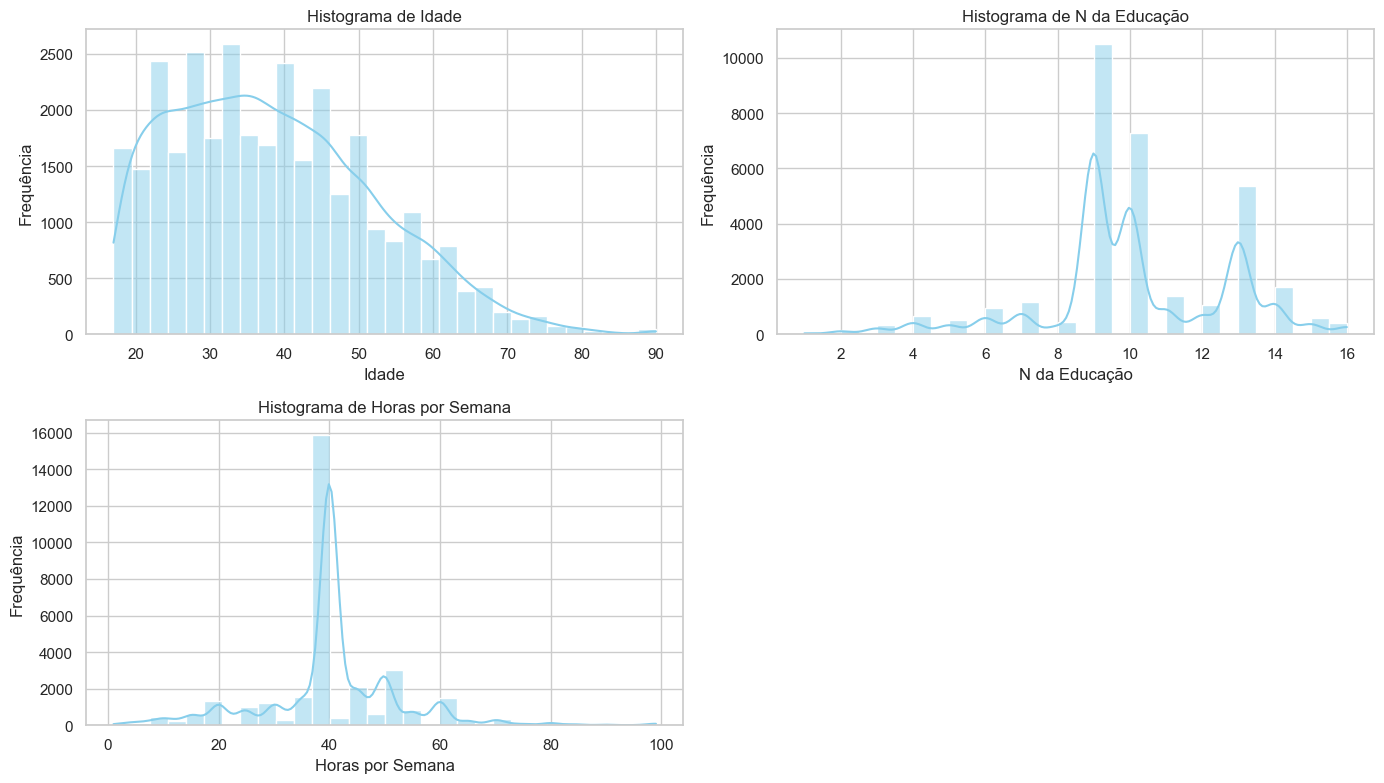

In [70]:
# Configurações gerais para os gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Histogramas para variáveis numéricas
numeric_columns_plot = ['Idade', 'N da Educação', 'Horas por Semana']

for i, column in enumerate(numeric_columns_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('../plots/histograma_variaveis_numericas.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

- 2. Visualização com Box Plots

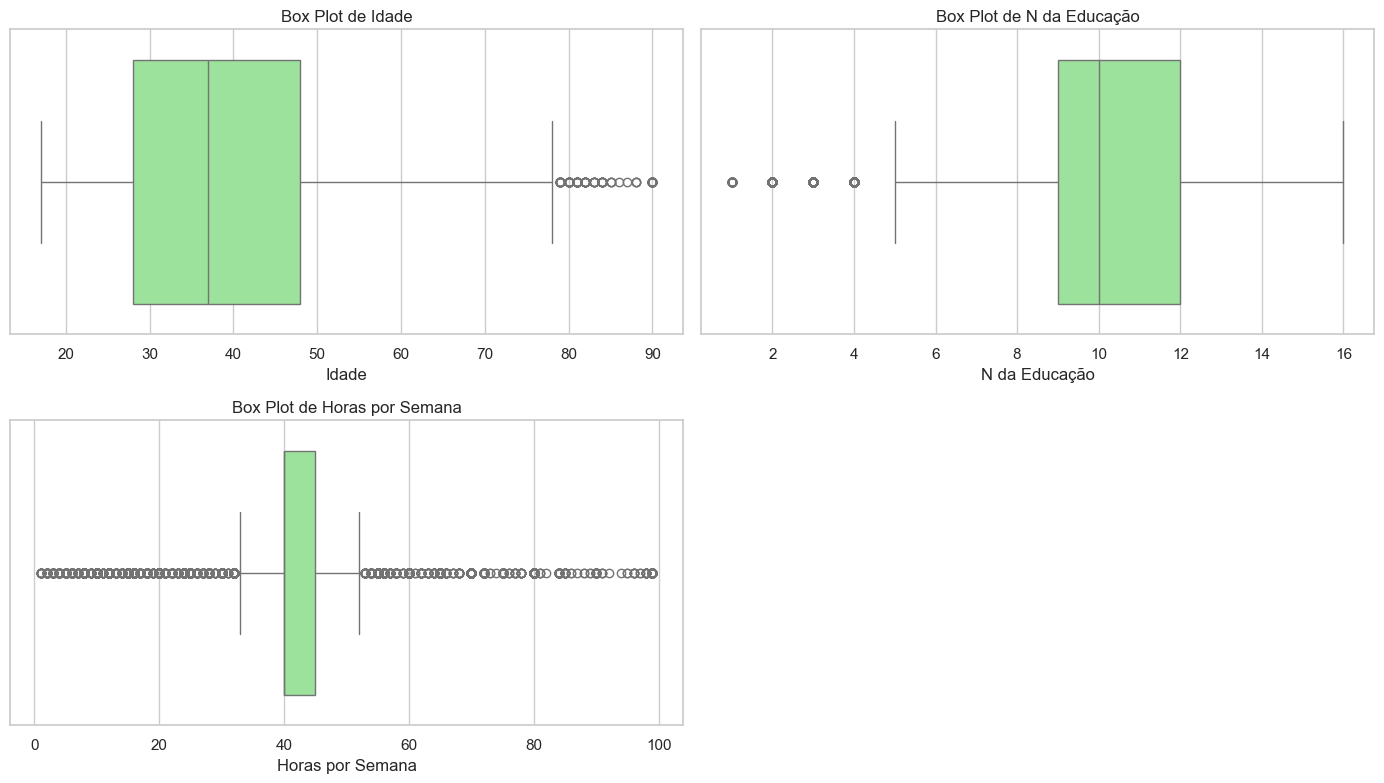

In [71]:
plt.figure(figsize=(14, 8))

for i, column in enumerate(numeric_columns_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f'Box Plot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.savefig('../plots/boxplot_variaveis_numericas.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

- Analise dos graficos de Histogramas e Box Plots
    1. Idade: A distribuição da idade reflete uma população predominantemente adulta e economicamente ativa. Os outliers em idades mais avançadas, embora poucos, indicam que uma pequena parte da população continua trabalhando além da idade típica de aposentadoria.

    2. Educação: A maioria das pessoas tem um nível de educação que corresponde ao ensino médio ou superior. A distribuição indica que o nível educacional médio na amostra é relativamente alto, com a maioria dos indivíduos tendo completado pelo menos o ensino médio.

    3. Horas por Semana: A maioria das pessoas trabalha em tempo integral, mas a presença de outliers sugere que há variações significativas em estilos de vida e tipos de emprego. Esses outliers podem ser importantes para análises futuras, especialmente se estivermos interessados em entender o impacto do tempo de trabalho na renda.

- 3. Técnicas Avançadas de Projeção de Dados (t-SNE e UMAP)

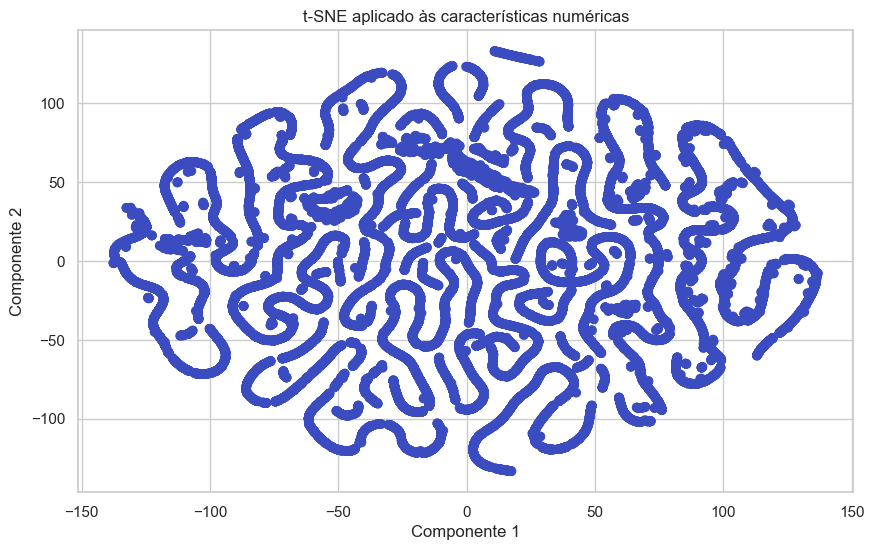

c:\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


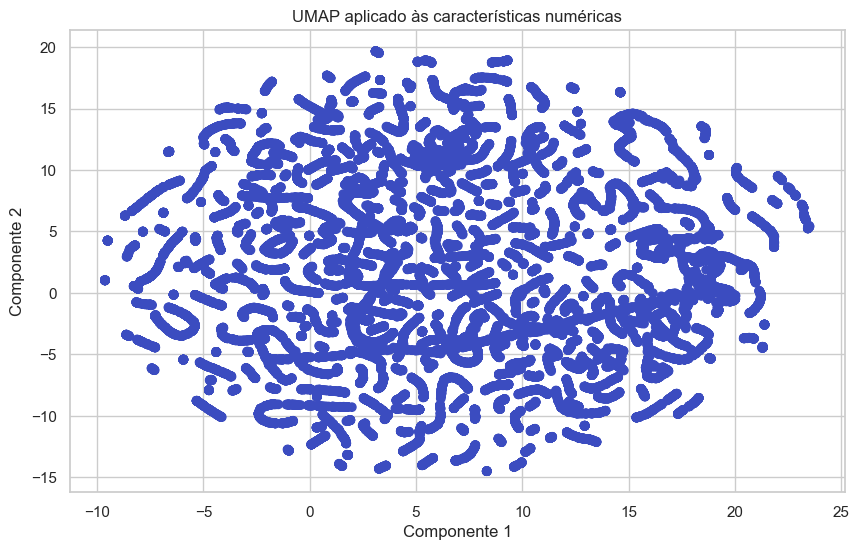

In [72]:
# Selecionando algumas características numéricas para t-SNE e UMAP
if show_analytics_TSNE_and_umap:    
    features = data[numeric_columns]

    # Aplicando t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)

    # Visualizando t-SNE
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Classe'].apply(lambda x: 1 if x == '>50K' else 0), cmap='coolwarm')
    plt.title('t-SNE aplicado às características numéricas')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.savefig('../plots/tsne_aplicado_caracteristicas_numericas.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    # Aplicando UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_results = reducer.fit_transform(features)

    # Visualizando UMAP
    plt.figure(figsize=(10, 6))
    plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data['Classe'].apply(lambda x: 1 if x == '>50K' else 0), cmap='coolwarm')
    plt.title('UMAP aplicado às características numéricas')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.savefig('../plots/umap_aplicado_caracteristicas_numericas.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

***

## 5. Explorando Variáveis Categóricas
**Explorar a distribuição de características categóricas no conjunto de dados "Adult Income" usando gráficos de barras e de pizza para entender as frequências e relacionamentos dessas variáveis.**

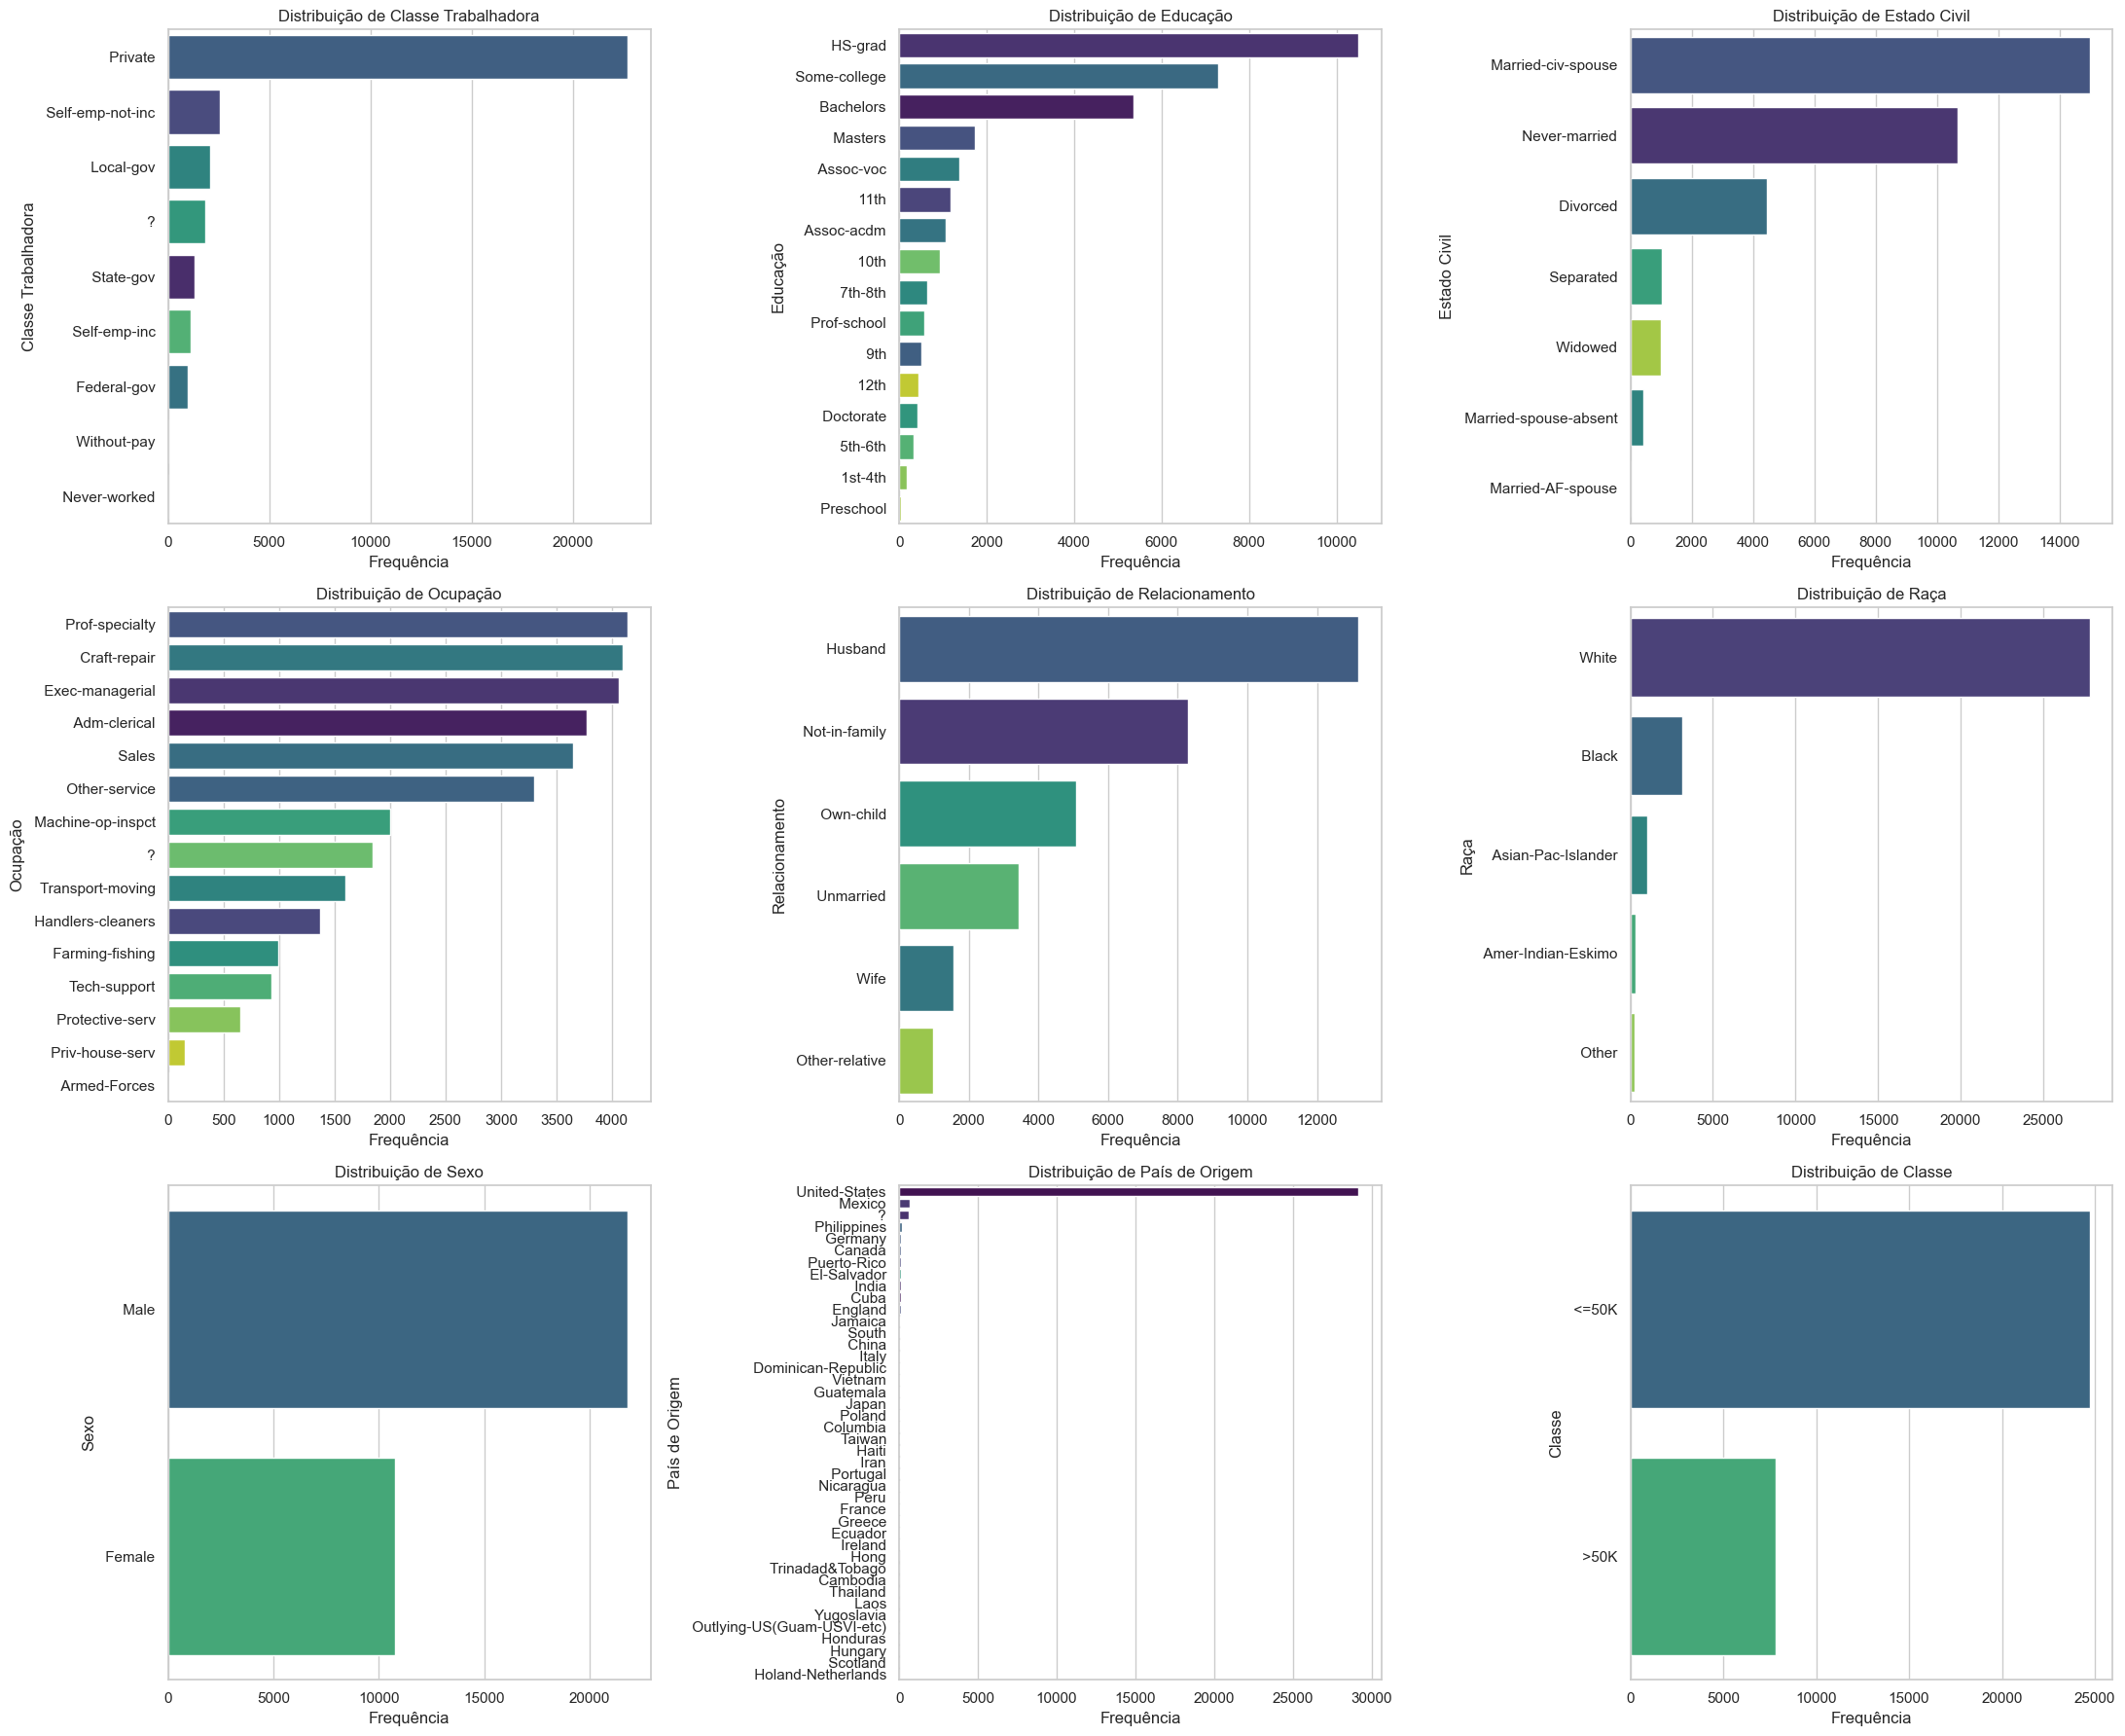

In [73]:
categorical_columns = ['Classe Trabalhadora', 'Educação', 'Estado Civil', 'Ocupação', 'Relacionamento', 'Raça', 'Sexo', 'País de Origem', 'Classe']

# Configurações gerais para os gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(22, 18))

# Criando gráficos de barras para as variáveis categóricas
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    # Adjusted to avoid FutureWarning by setting 'hue' and 'legend'
    sns.countplot(y=column, hue=column, data=data, palette="viridis", order=data[column].value_counts().index, dodge=False)
    plt.title(f'Distribuição de {column}')
    plt.xlabel('Frequência')
    plt.ylabel(column)
    plt.legend([],[], frameon=False)  # Hide the legend

plt.tight_layout()
plt.show()

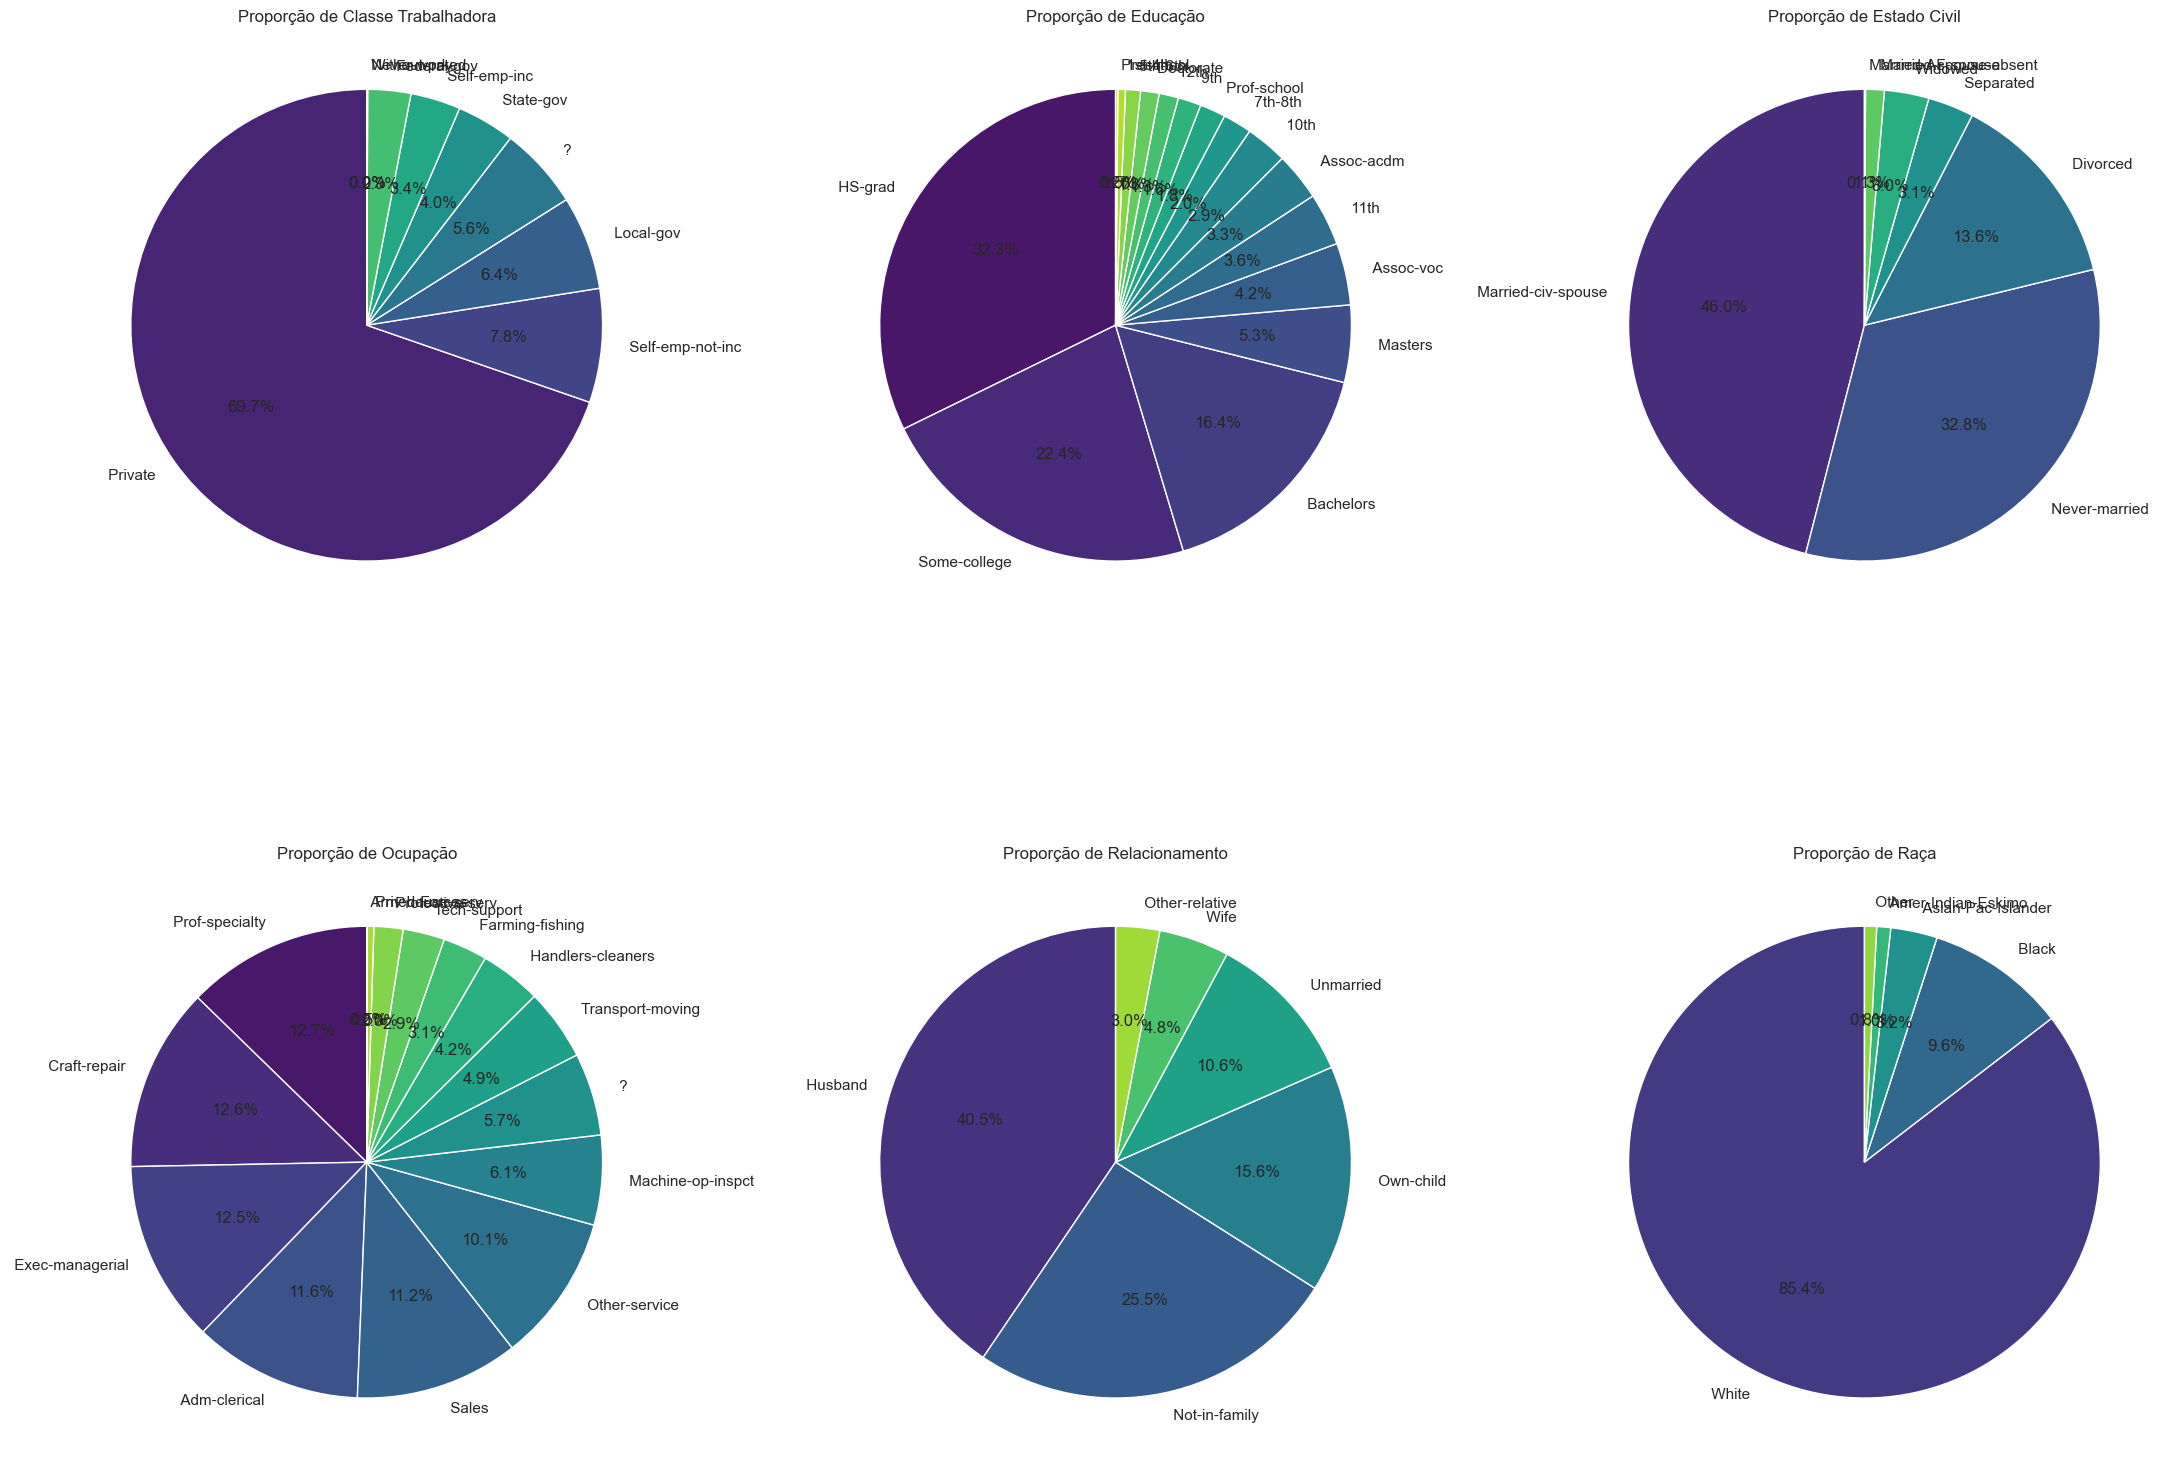

In [74]:
# Configurações gerais para os gráficos de pizza
plt.figure(figsize=(22, 18))

# Criando gráficos de pizza para as variáveis categóricas
for i, column in enumerate(categorical_columns[:6], 1):  # Limitado a 6 gráficos para melhor visualização
    plt.subplot(2, 3, i)
    data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis", len(data[column].unique())), startangle=90)
    plt.title(f'Proporção de {column}')
    plt.ylabel('')  # Remove o rótulo y para gráficos de pizza

plt.tight_layout()
plt.show()

### Discussão

1. **Classe de Trabalho:**
   - A maior parte dos indivíduos pertence à classe Private, o que é esperado em muitas economias, seguida por Self-emp-not-inc e Local-gov. A predominância da classe Private reflete a prevalência do emprego privado em relação a outras categorias de trabalho.

2. **Educação :**
   - As categorias mais frequentes são HS-grad e Some-college, indicando que a maioria dos indivíduos possui um nível de educação até o ensino médio ou alguns anos de faculdade. Seguidas por Bachelors, essas categorias indicam um nível educacional médio a alto na população.

3. **Estado Civil:**
   - A categoria Married-civ-spouse é a mais comum, seguida por Never-married. Isso sugere que muitos indivíduos estão em casamentos civis, refletindo o padrão social de casamentos em idade adulta.

4. **Ocupação:**
   - As ocupações Prof-specialty, Craft-repair, e Exec-managerial são as mais comuns, indicando uma alta concentração de indivíduos em trabalhos técnicos e de gestão. Essas ocupações sugerem que o conjunto de dados pode estar ligeiramente inclinado para indivíduos em profissões técnicas e administrativas.

5. **Relacionamento:**
   - A categoria Husband é a mais frequente, refletindo uma população com muitos casais heterossexuais. A alta proporção de Husband indica uma representação significativa de indivíduos casados, possivelmente influenciando outras variáveis como marital-status.

6. **Raça:**
   - A categoria White é predominante, seguida por Black, consistente com a demografia dos Estados Unidos. A alta proporção de White indica que essa variável pode ser uma proxy significativa em análises relacionadas à renda e ocupação.

7. **Sexo:**
   - A proporção de Male é maior que Female, refletindo uma ligeira dominância masculina na força de trabalho representada. Essa maior proporção de homens pode influenciar análises de renda e ocupação, especialmente em indústrias dominadas por homens.

8. **País de Origem:**
   - A maioria dos indivíduos são dos United-States, com poucos representantes de outros países. A proporção esmagadora de indivíduos dos Estados Unidos indica que as análises serão fortemente influenciadas pelas condições socioeconômicas dos EUA.

9. **Classe:**
   - A maioria dos indivíduos ganha <=50K, com uma menor proporção ganhando >50K. Esta proporção é crítica, pois a variável Classe é a variável alvo e será essencial para qualquer análise de classificação.

A exploração das variáveis categóricas revela distribuições que são consistentes com expectativas sociais e demográficas, como a predominância de indivíduos empregados no setor privado e com educação média a alta. Essas distribuições fornecem uma base sólida para explorar relações entre variáveis categóricas e a variável alvo Classe, bem como para compreender as características da população estudada.



***

## 6. Análise de Correlação
**Calcular os coeficientes de correlação entre características numéricas no conjunto de dados, visualizar as correlações usando um mapa de calor**

In [75]:
# Calcular a matriz de correlação
correlation_matrix = data[numeric_columns].corr()

# Exibir a matriz de correlação
correlation_matrix

,Idade,fnlwgt,N da Educação,Ganho de Capital,Perda de Capital,Horas por Semana
Idade,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
N da Educação,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Ganho de Capital,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Perda de Capital,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Horas por Semana,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


- Matriz de Correlação: A matriz de correlação é calculada para as características numéricas do conjunto de dados. Essa matriz mostra os coeficientes de correlação de Pearson entre todas as combinações possíveis de pares de variáveis numéricas.

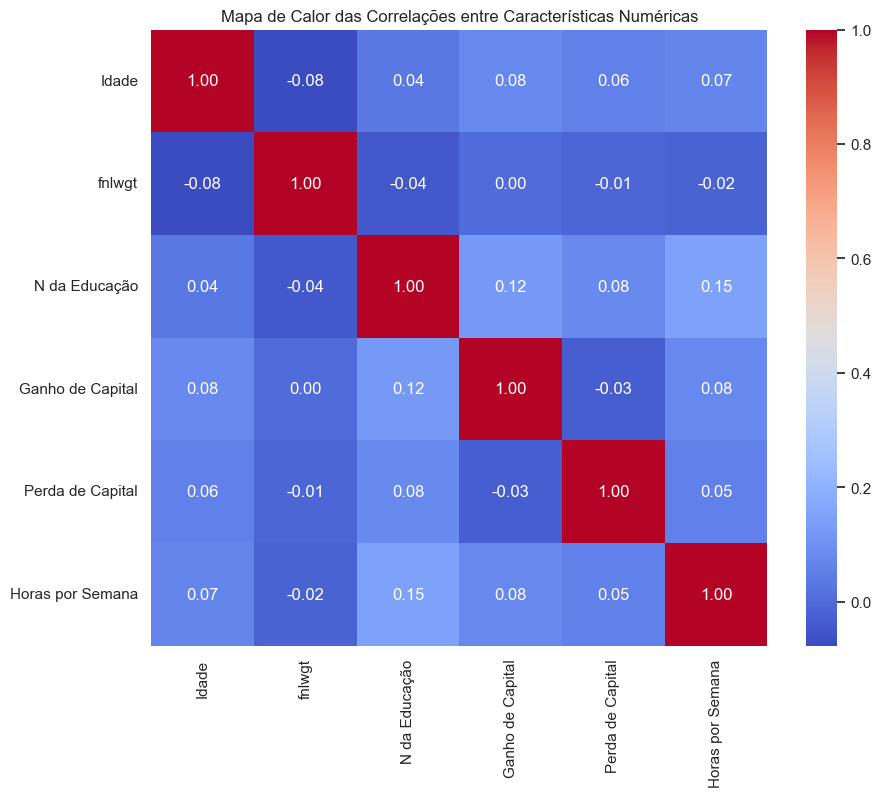

In [76]:
# Configurações gerais para o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Mapa de Calor das Correlações entre Características Numéricas')
plt.show()

- Mapa de Calor: O mapa de calor é uma visualização da matriz de correlação, onde cada célula mostra a força da correlação entre duas variáveis. O uso de annot=True exibe os valores dos coeficientes de correlação diretamente nas células do mapa, facilitando a interpretação.

### Discussão

1. **Idade  e Horas por Semana :**
   - **Correlação:** A correlação é baixa, indicando que a idade do indivíduo não está fortemente relacionada ao número de horas que ele trabalha por semana.
   - **Implicações:** Isso sugere que as políticas de trabalho, como horas semanais, não são fortemente influenciadas pela idade dos indivíduos.

2. **Número de Educação e `fnlwgt`:**
   - **Correlação:** A correlação é muito baixa, o que indica que o nível de educação não está relacionado com o peso final do indivíduo na amostra.
   - **Implicações:** O fator de peso final (fnlwgt) não deve ser considerado relevante na análise de educação, pois não reflete diretamente o nível educacional.

3. **Ganho de Capital e Perda de Capital:**
   - **Correlação:** Existe uma correlação moderada, mas não muito forte. Isso sugere que, em geral, indivíduos que têm altos ganhos de capital não necessariamente têm grandes perdas de capital.
   - **Implicações:** Embora haja alguma relação entre os ganhos e perdas de capital, esses fatores provavelmente refletem diferentes aspectos da situação financeira dos indivíduos e devem ser analisados separadamente.

4. **Idade e Ganho de Capital:**
   - **Correlação:** Existe uma correlação baixa. Isso indica que a idade de uma pessoa tem pouco impacto sobre a quantidade de ganho de capital que ela pode ter.
   - **Implicações:** Ganho de capital parece ser mais influenciado por outros fatores, como a ocupação ou oportunidades de investimento, e não diretamente pela idade.

5. **Horas por Semana e Ganho de Capital:**
   - **Correlação:** A correlação é baixa, sugerindo que trabalhar mais horas por semana não está diretamente relacionado a ter ganhos de capital maiores.
   - **Implicações:** A quantidade de capital ganho parece depender mais da qualidade do trabalho e das oportunidades financeiras do que do número de horas trabalhadas.

- O mapa de calor das correlações revelou que as características numéricas no conjunto de dados geralmente apresentam correlações baixas entre si. Isso indica que, em grande parte, essas variáveis capturam aspectos diferentes da vida dos indivíduos e que análises futuras podem se beneficiar de considerar essas variáveis de maneira independente.

- Correlação moderada entre ``Ganho de capital`` e ``Perda de capital`` sugere que ganhos e perdas de capital são parcialmente relacionados, mas a correlação não é forte o suficiente para tratar essas variáveis como intercambiáveis. Outras variáveis, como ``Educação`` e ``Horas por Semana``, mostraram-se pouco correlacionadas, sugerindo que essas características têm influências diferentes sobre a renda e outras medidas de interesse.



***

## 7. Detecção de Outliers
**Detectar outliers em características numéricas do conjunto de dados usando técnicas como escore z ou método IQR, visualizar esses outliers** 

In [77]:
# Detecção de Outliers Usando o Método IQR (Intervalo Interquartil)
# Função para detectar outliers usando o método IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detectando outliers para as características numéricas
outliers_age = detect_outliers_iqr(data, 'Idade')
outliers_capital_gain = detect_outliers_iqr(data, 'Ganho de Capital')
outliers_capital_loss = detect_outliers_iqr(data, 'Perda de Capital')

# Exibir a quantidade de outliers detectados
print(f'Outliers Idade: {len(outliers_age)}')
print(f'Outliers Ganho de Capital: {len(outliers_capital_gain)}')
print(f'Outliers Perda de Capital: {len(outliers_capital_loss)}')

Outliers Idade: 143
Outliers Ganho de Capital: 2712
Outliers Perda de Capital: 1519


### Explicação:

- **Método IQR**: Usamos o método do intervalo interquartil (IQR) para detectar outliers. Os outliers são valores fora do intervalo 
Q1−1.5×IQR e Q3+1.5×IQR, onde Q1 e Q3 são os quartis primeiro e terceiro.
- **Outliers Detectados**: O número de outliers em variáveis como age, capital-gain, e capital-loss é calculado e exibido.

In [78]:
# Detecção de Outliers Usando Escore Z
# Função para detectar outliers usando escore z
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = stats.zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > threshold]
    return outliers

# Detectando outliers para as características numéricas usando escore z
outliers_age_z = detect_outliers_zscore(data, 'Idade')
outliers_capital_gain_z = detect_outliers_zscore(data, 'Ganho de Capital')
outliers_capital_loss_z = detect_outliers_zscore(data, 'Perda de Capital')

# Exibir a quantidade de outliers detectados usando escore z
print(f'Outliers Idade (Escore Z): {len(outliers_age_z)}')
print(f'Outliers Ganho de Capital (Escore Z): {len(outliers_capital_gain_z)}')
print(f'Outliers Perda de Capital (Escore Z): {len(outliers_capital_loss_z)}')

Outliers Idade (Escore Z): 121
Outliers Ganho de Capital (Escore Z): 215
Outliers Perda de Capital (Escore Z): 1470


### Explicação:

- **Escore Z**: Usamos o escore z para detectar outliers. Valores com escore z absoluto maior que 3 são considerados outliers. Isso é particularmente útil para detectar outliers em distribuições normais.
- **Outliers Detectados**: O número de outliers em Idade, Ganho de Capital, e Perda de Capital usando o método de escore z é calculado e exibido.

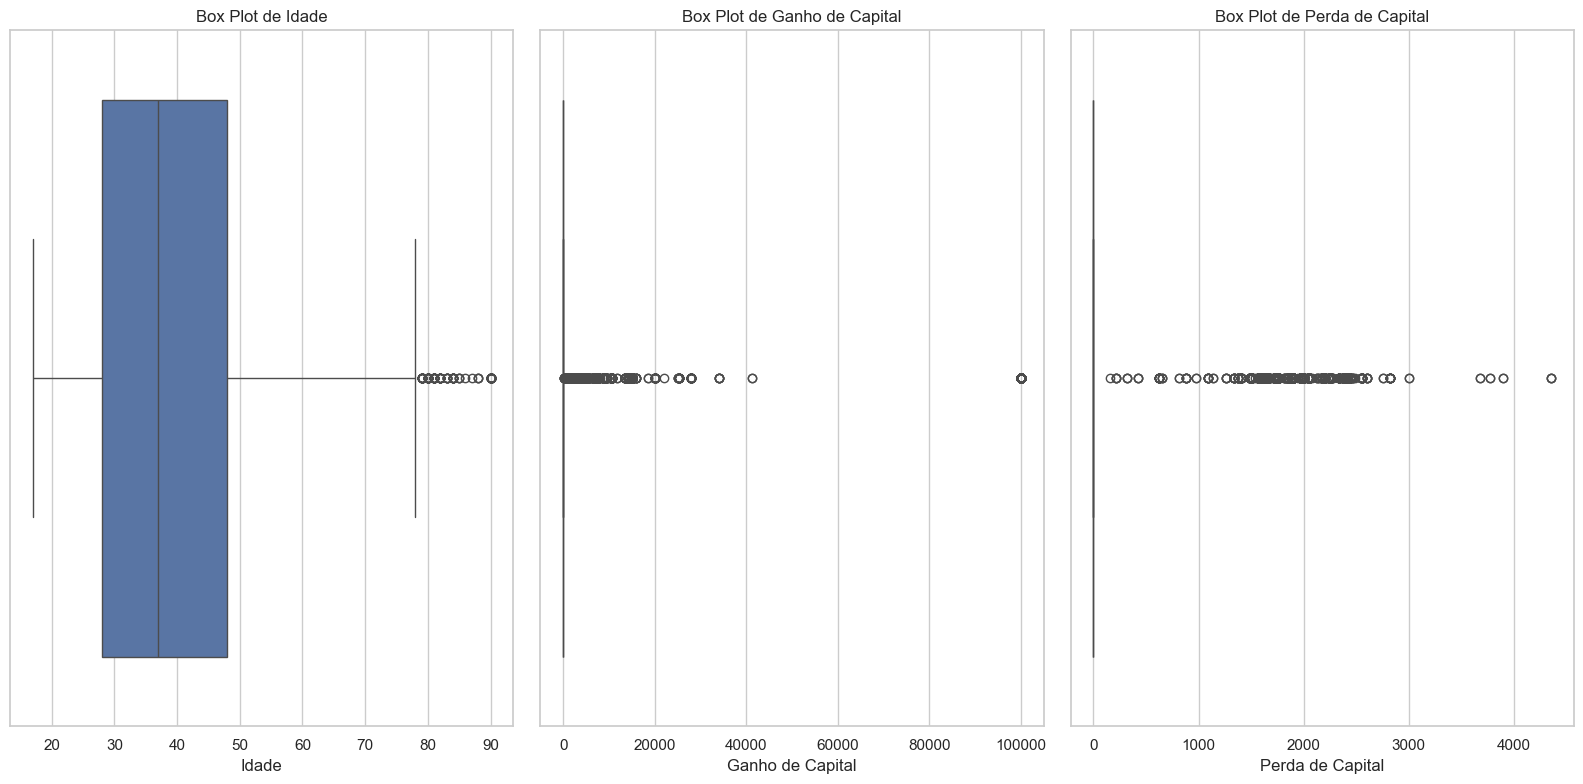

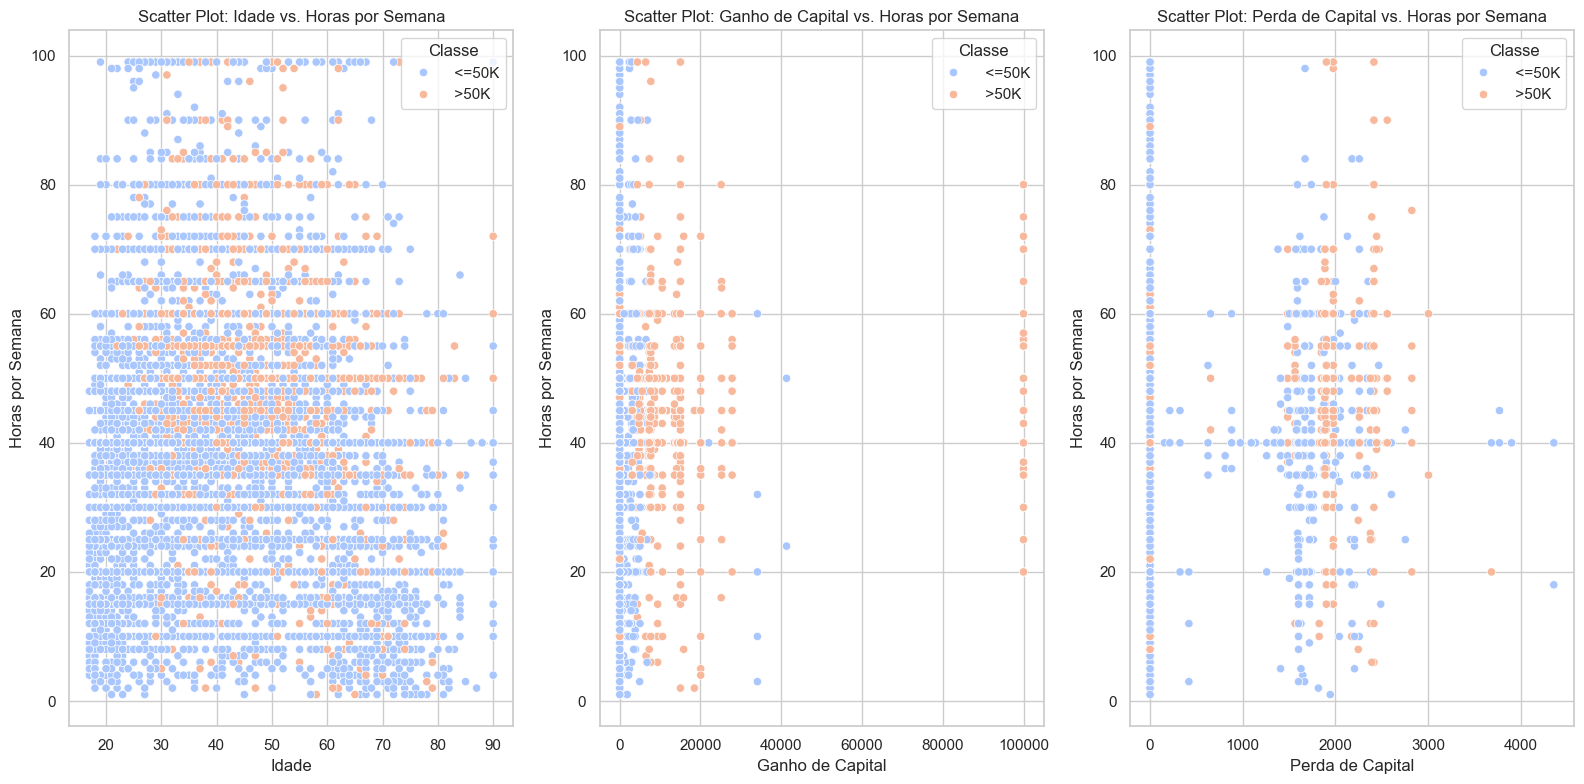

In [79]:
# Visualizando outliers com Box Plots
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x='Idade', data=data)
plt.title('Box Plot de Idade')

plt.subplot(1, 3, 2)
sns.boxplot(x='Ganho de Capital', data=data)
plt.title('Box Plot de Ganho de Capital')

plt.subplot(1, 3, 3)
sns.boxplot(x='Perda de Capital', data=data)
plt.title('Box Plot de Perda de Capital')

plt.tight_layout()
plt.savefig('../plots/boxplot_outliers.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

# Visualizando outliers com Scatter Plots
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Idade', y='Horas por Semana', hue='Classe', palette="coolwarm")
plt.title('Scatter Plot: Idade vs. Horas por Semana')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Ganho de Capital', y='Horas por Semana', hue='Classe', palette="coolwarm")
plt.title('Scatter Plot: Ganho de Capital vs. Horas por Semana')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Perda de Capital', y='Horas por Semana', hue='Classe', palette="coolwarm")
plt.title('Scatter Plot: Perda de Capital vs. Horas por Semana')

plt.tight_layout()
plt.savefig('../plots/scatterplot_outliers.png', dpi=300, bbox_inches='tight', format='png')
plt.show()


### Discussão sobre os Outliers Identificados

1. **Idade:**
   - **Box Plot:** Os outliers detectados em `Idade` estão principalmente nas faixas etárias mais avançadas, como acima dos 70 anos. Estes indivíduos ainda estão economicamente ativos, o que pode ser atípico para a média da população.
   - **Impacto na Análise:** Esses outliers indicam uma subpopulação de indivíduos que, apesar da idade avançada, continuam trabalhando. Isso pode influenciar análises de políticas de aposentadoria ou trabalho tardio.

2. **Ganho de Capital:**
   - **Box Plot:** Existem outliers significativos em `Ganho de Capital`, com valores muito acima da média, indicando indivíduos com ganhos de capital consideráveis.
   - **Impacto na Análise:** Esses outliers podem distorcer a análise de renda, especialmente ao calcular medidas de tendência central, como a média. A exclusão ou tratamento especial desses outliers pode ser necessário para evitar distorções.

3. **Perda de Capital:**
   - **Box Plot:** Outliers em `Perda de Capital` refletem grandes perdas de capital em alguns indivíduos, o que pode indicar envolvimento em investimentos de alto risco ou perdas financeiras significativas.
   - **Impacto na Análise:** Assim como com `capital-gain`, esses outliers podem influenciar a distribuição de renda e análise de correlação com outras variáveis. Esses casos extremos devem ser investigados mais a fundo.

4. **Considerações Gerais:**
   - **Scatter Plots:** As visualizações mostram que os outliers podem estar relacionados a padrões não lineares com outras variáveis, como `hours-per-week`. A presença desses outliers pode influenciar a interpretação de relações entre variáveis e deve ser analisada cuidadosamente.

A detecção de outliers nas variáveis `Idade`, `Ganho de Capital`, e `Perda de Capital` revela a presença de valores extremos que podem impactar a análise. Esses outliers, especialmente em `capital-gain` e `Perda de Capital`, têm o potencial de distorcer as distribuições e correlações, tornando necessário o tratamento especial ou a remoção desses valores dependendo do objetivo da análise subsequente.
